In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
 X, Y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)

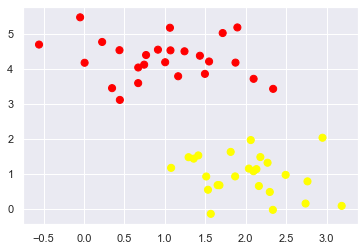

In [4]:
plt.scatter (X[:,0],X[:,1],c = Y , s=50, cmap= "autumn")

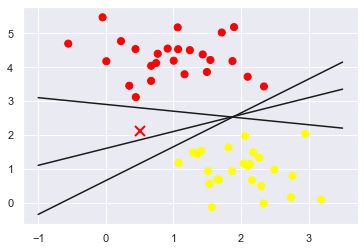

In [5]:
xx= np.linspace(-1,3.5)
plt.scatter (X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],"x",color= "red",markeredgewidth=2, markersize=10)

for a, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy=a *xx +b
    plt.plot(xx,yy,"-k")

(-1, 3.5)

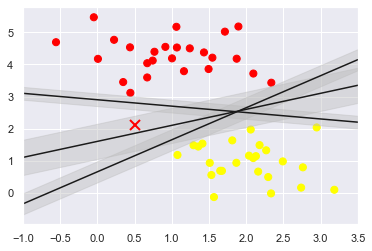

In [6]:
xx= np.linspace(-1,3.5)
plt.scatter (X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1],"x",color= "red",markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33),(0.5,1.6, 0.55),(-0.2,2.9, 0.2)]:
    yy=a *xx +b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d, edgecolor="none",color="#BBBBBB", alpha=0.4)
    
plt.xlim(-1,3.5)

In [7]:
from sklearn.svm import SVC

In [8]:
model=SVC(kernel="linear", C= 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la funcion de decision para una clasificacion en 2d con SVC"""
    if ax is None:
        ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #generamos a planilla para evalunar el modelo
    
    xx=np.linspace(xlim[0], xlim[1],30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y,X =np.meshgrid(yy,xx)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P= model.decision_function(xy). reshape(X.shape)
    
    ## Representamos las fronteras y los margenes del SVC
    
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=("--","-","--"))
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth =1, facecolors ="Black")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

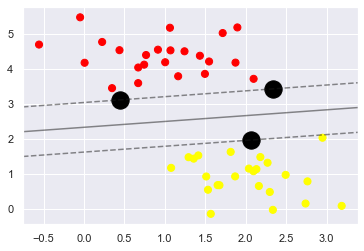

In [14]:
plt.scatter(X[:,0],X[:,1], c =Y, s=50, cmap="autumn")
plt_svc ( model,plot_support=True)